In [3]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
data=pd.read_csv("bina.csv")

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Veri seti hakkında bilgilendirme

X1 Bağıl(göreceli) Kompaktlık

X2 Yüzey Alanı

X3 Duvar Alanı

X4 Çatı Alanı

X5 Toplam Yükseklik

X6 Yönlendirme

X7 Cam Alanı

X8 Cam Alanı Dağılımı

y1 Isıtma Yükü

y2 Soğutma Yükü

## Veri seti analizi

In [5]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## Veri setinde eksik veri mevcut mu ?

<AxesSubplot:>

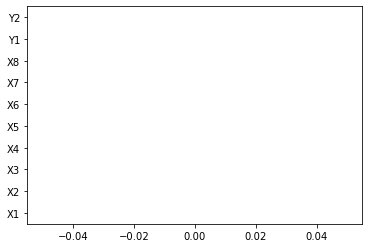

In [7]:
data.isnull().sum().sort_values().plot.barh()

## X7 ve X8 verilerinin incelenmesi

In [8]:
data["X7"].nunique()

4

In [9]:
data["X7"].unique()

array([0.  , 0.1 , 0.25, 0.4 ])

In [10]:
data["X7"].value_counts()

0.40    240
0.10    240
0.25    240
0.00     48
Name: X7, dtype: int64

In [11]:
data["X8"].nunique()

6

In [12]:
data["X8"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [13]:
data["X8"].value_counts()

5    144
4    144
3    144
2    144
1    144
0     48
Name: X8, dtype: int64

## X8 ve X7 değişkenleri arasındaki korelasyon ilişkisinin incelenmesi

In [14]:
data[["X8","X7"]].corr()

,X8,X7
X8,1.000000,0.212964
X7,0.212964,1.000000


## Y1 değişkeninin diğer verilerle olan korelasyon ilişkisinin incelenmesi

<AxesSubplot:>

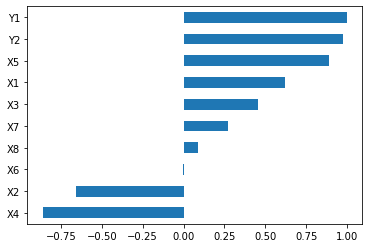

In [15]:
data.corr()["Y1"].sort_values().plot.barh()

## Y2 değişkeninin diğer verilerle olan korelasyon ilişkisinin incelenmesi

<AxesSubplot:>

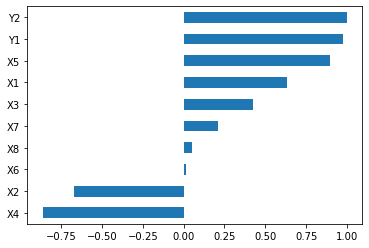

In [16]:
data.corr()["Y2"].sort_values().plot.barh()

#### X8 ve X6 değişkenlerinin Y1 ve Y2 değişkenleri ile olan ilişkisi pozitif yönlü ancak çok düşük

#### X2 ve X4 değişkeninin de hem Y1 hem de Y2 değişkenleri ile olan korelasyonu negatif yüksek şiddette denebilir.Ancak beklentim biri için negatif ilişkide olursa diğeri için de pozitif ilişkide olacağı yönündeydi.

## Model oluşturma süreci

In [18]:
y=data[["Y1","Y2"]]
x=data.drop(columns=["Y1","Y2","X6","X8"])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

### Doğrusal Regresyon modellerini deneyelim 

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,confusion_matrix
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
lr_hata_train=np.sqrt(mean_squared_error(y_train,lr_model.predict(x_train)))
lr_hata_test=np.sqrt(mean_squared_error(y_test,lr_model.predict(x_test)))
print("Eğitim hatası: {} Test Hatası: {}".format(lr_hata_test,lr_hata_train))

Eğitim hatası: 3.0859516375907416 Test Hatası: 3.0636843685037998


### Veriden ufak bir veri kaybını göze alarak temel bileşen analizi yapalım

In [21]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca=PCA()
x_reduced_train=pca.fit_transform(preprocessing.scale(x_train))
x_reduced_test=pca.fit_transform(preprocessing.scale(x_test))
pca_model=LinearRegression()
pca_model.fit(x_reduced_train,y_train)
pca_hata_train=np.sqrt(mean_squared_error(y_train,pca_model.predict(x_reduced_train)))
pca_hata_test=np.sqrt(mean_squared_error(y_test,pca_model.predict(x_reduced_test)))
print("Eğitim hatası: {} Test Hatası: {}".format(pca_hata_test,pca_hata_train))

Eğitim hatası: 3.324087519018104 Test Hatası: 3.0626267337502395


### PCA model tuning

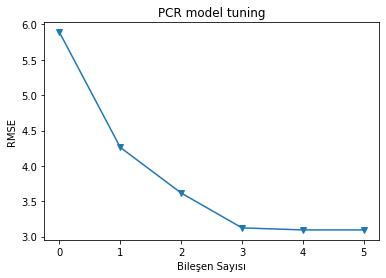

In [22]:
from sklearn import model_selection
lm=LinearRegression()
RMSE=list()
for i in np.arange(1,x_reduced_train.shape[1]+1):
    score=np.sqrt(-1*model_selection.cross_val_score(lm,x_reduced_train[:,:i],y_train,
                                                    cv=model_selection.KFold(n_splits=10,shuffle=True,random_state=42),
                                                    scoring="neg_mean_squared_error").mean())
    RMSE.append(score)
plt.plot(RMSE,"-v")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.title("PCR model tuning")
plt.show()

In [38]:
lr=LinearRegression()
pcr_model=lr.fit(x_reduced_train[:,:4],y_train)
print("Eğitim hatası: {} Test Hatası: {}".format(np.sqrt(mean_squared_error(y_test,pcr_model.predict(x_reduced_test[:,:4])))
                                                 ,
                    np.sqrt(mean_squared_error(y_train,pcr_model.predict(x_reduced_train[:,:4])))))

Eğitim hatası: 3.250834468539019 Test Hatası: 3.0963317445674043


#### Ridge regresyon ile model oluşturma

In [24]:
from sklearn.linear_model import Ridge,RidgeCV
ridge_model=Ridge().fit(x_train,y_train)
alphas=10**np.linspace(10,-2,100)*(0.5)
ridge_model_train_hata=np.sqrt(mean_squared_error(y_train,ridge_model.predict(x_train)))
ridge_model_test_hata=np.sqrt(mean_squared_error(y_test,ridge_model.predict(x_test)))
print("Eğitim hatası: {} Test Hatası: {}".format(ridge_model_train_hata,ridge_model_test_hata))

Eğitim hatası: 3.14287142395888 Test Hatası: 3.152896737006581


In [25]:
ridge_cv_model=RidgeCV(alphas=alphas,scoring="neg_mean_squared_error",normalize=True,cv=10)
ridge_cv_model.fit(x_train,y_train)
ridge_cv_model.alpha_

0.005

In [26]:
ridge_cv_model_train_hata=np.sqrt(mean_squared_error(y_train,ridge_cv_model.predict(x_train)))
ridge_cv_model_test_hata=np.sqrt(mean_squared_error(y_test,ridge_cv_model.predict(x_test)))
print("Eğitim hatası: {} Test Hatası: {}".format(ridge_cv_model_train_hata,ridge_cv_model_test_hata))

Eğitim hatası: 3.076185602045664 Test Hatası: 3.0996973032893824


####  Lasso Regresyon

In [27]:
from sklearn.linear_model import Lasso,LassoCV,MultiTaskLassoCV
lasso_model=Lasso().fit(x_train,y_train)
lasso_model_train_hata=np.sqrt(mean_squared_error(y_train,lasso_model.predict(x_train)))
lasso_model_test_hata=np.sqrt(mean_squared_error(y_test,lasso_model.predict(x_test)))
print("Eğitim hatası: {} Test Hatası: {}".format(lasso_model_train_hata,lasso_model_test_hata))

Eğitim hatası: 4.525936388254252 Test Hatası: 4.676404374914983


In [28]:
lasso_cv_model=MultiTaskLassoCV(alphas=alphas,cv=10,normalize=True)

In [29]:
lasso_cv_model.fit(x_train,y_train)
lasso_cv_model_train_hata=np.sqrt(mean_squared_error(y_train,lasso_model.predict(x_train)))
lasso_cv_model_test_hata=np.sqrt(mean_squared_error(y_test,lasso_model.predict(x_test)))
print("Eğitim hatası: {} Test Hatası: {}".format(lasso_cv_model_train_hata,lasso_cv_model_test_hata))

Eğitim hatası: 4.525936388254252 Test Hatası: 4.676404374914983


#### PLS Regresyon

In [30]:
from sklearn.cross_decomposition import PLSRegression

In [31]:
pls_model=PLSRegression()
pls_model.fit(x_train,y_train)
pls_model_train_hata=np.sqrt(mean_squared_error(y_train,pls_model.predict(x_train)))
pls_model_test_hata=np.sqrt(mean_squared_error(y_test,pls_model.predict(x_test)))
print("Eğitim hatası: {} Test Hatası: {}".format(pls_model_train_hata,pls_model_test_hata))

Eğitim hatası: 3.5582445749718747 Test Hatası: 3.6829190308710236


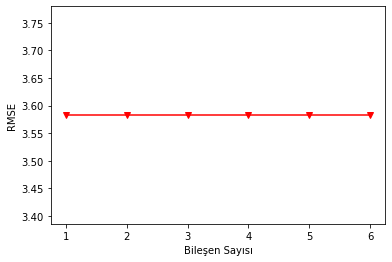

In [32]:
from sklearn.model_selection import cross_val_score
cv_10=model_selection.KFold(n_splits=10,shuffle=True,random_state=42)
rmse=[]
for i in np.arange(1,x_train.shape[1]+1):
    pls=PLSRegression(n_components=i)
    score=np.sqrt(-1*cross_val_score(pls_model,x_train,y_train,cv=cv_10,scoring="neg_mean_squared_error").mean())
    rmse.append(score)
plt.plot(np.arange(1,x_train.shape[1]+1),np.array(rmse),"-v",c="r")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.show()

In [33]:
pls_cv_model=PLSRegression(n_components=5).fit(x_train,y_train)
pls_cv_model_train_hata=np.sqrt(mean_squared_error(y_train,pls_cv_model.predict(x_train)))
pls_cv_model_test_hata=np.sqrt(mean_squared_error(y_test,pls_cv_model.predict(x_test)))
print("Eğitim hatası: {} Test Hatası: {}".format(pls_cv_model_train_hata,pls_cv_model_test_hata))

Eğitim hatası: 3.062626733750239 Test Hatası: 3.08262522440171


#### ElasticNet Regresyonu

In [34]:
from sklearn.linear_model import ElasticNet,ElasticNetCV,MultiTaskElasticNetCV

In [35]:
enet_model=ElasticNet().fit(x_train,y_train)
enet_train_hata=np.sqrt(mean_squared_error(y_train,enet_model.predict(x_train)))
enet_test_hata=np.sqrt(mean_squared_error(y_test,enet_model.predict(x_test)))
print("Eğitim hatası: {} Test Hatası: {}".format(enet_train_hata,enet_test_hata))

Eğitim hatası: 4.401924747449182 Test Hatası: 4.541302251760081


#### Model tuning

In [36]:
enet_cv_model=MultiTaskLassoCV(cv=10).fit(x_train,y_train)
enet_cv_train_hata=np.sqrt(mean_squared_error(y_train,enet_cv_model.predict(x_train)))
enet_cv_test_hata=np.sqrt(mean_squared_error(y_test,enet_cv_model.predict(x_test)))
print("Eğitim hatası: {} Test Hatası: {}".format(enet_cv_train_hata,enet_cv_test_hata))

Eğitim hatası: 4.164566625064602 Test Hatası: 4.2720772299275


## Doğrusal Olmayan Regresyon modelleri

#### XGBoost

In [1]:
!pip install xgboost

In [40]:
from xgboost import XGBRegressor

In [48]:
xgb_model=XGBRegressor()
xgb_model.fit(x_train,y_train.iloc[:,1])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
np.sqrt(mean_squared_error(y_test.iloc[:,1], xgb_model.predict(x_test)))+np.sqrt(mean_squared_error(y_test.iloc[:,1],xgb_model.predict(x_test)))

3.43016133060005

In [61]:
from sklearn.model_selection import GridSearchCV
xgb_params={
    "colsample_by_tree":[0.3,0.4,0.5,0.6,0.8,0.9,1],"n_estimators":[100,200,500,1000,2000],"max_depth":[2,3,4,5,6],"learning_rate":[0.1,0.01,0.5]
}
xgb_model=XGBRegressor()
xgb_cv_model=GridSearchCV(estimator=xgb_model,cv=10,n_jobs=-1,verbose=2,param_grid=xgb_params).fit(x_train,y_train.iloc[:,1])

Fitting 10 folds for each of 525 candidates, totalling 5250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 14.0min


[22:14:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_by_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=-1)]: Done 5250 out of 5250 | elapsed: 15.1min finished


In [62]:
np.sqrt(mean_squared_error(y_test.iloc[:,1], xgb_cv_model.predict(x_test)))+np.sqrt(mean_squared_error(y_test.iloc[:,1],xgb_cv_model.predict(x_test)))

3.377546458950399

#### Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor().fit(x_train,y_train)

In [64]:
np.sqrt(mean_squared_error(y_test,rf_model.predict(x_test)))

1.2598528237962152

In [78]:
rf_params={
           "max_features":[2,3,10,5,7,10,13,15],
           "n_estimators":[100,200,500,1000,2000]}
rf_model=RandomForestRegressor()
rf_cv_model=GridSearchCV(rf_model,param_grid=rf_params,cv=10,n_jobs=-1).fit(x_train,y_train)

In [79]:
np.sqrt(mean_squared_error(y_test,rf_cv_model.predict(x_test)))

1.2577723701866514

In [80]:
1.2577723701866514-1.2598528237962152

-0.0020804536095637705

In [83]:
rf_cv_model.best_params_

{'max_features': 5, 'n_estimators': 200}

In [96]:
rf_cv_model2=RandomForestRegressor(n_estimators=1000,max_features=5,max_depth=12).fit(x_train,y_train)
np.sqrt(mean_squared_error(y_test,rf_cv_model2.predict(x_test)))

1.2573567222296815

#### Değişkenlerin önem düzeyleri

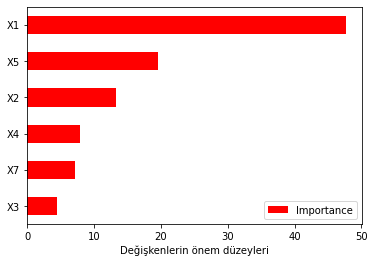

In [112]:
Importance=pd.DataFrame({"Importance":rf_cv_model2.feature_importances_*100},
                        index=x_train.columns)
Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="r");
plt.xlabel("Değişkenlerin önem düzeyleri")
plt.show()

#### CatBoost Model

In [117]:
from catboost import CatBoostRegressor
cat_model=CatBoostRegressor().fit(x_train,y_train.iloc[:,1])

Learning rate set to 0.03538
0:	learn: 9.1484346	total: 159ms	remaining: 2m 38s
1:	learn: 8.8881662	total: 159ms	remaining: 1m 19s
2:	learn: 8.6170768	total: 160ms	remaining: 53.2s
3:	learn: 8.3826402	total: 160ms	remaining: 39.9s
4:	learn: 8.1270061	total: 161ms	remaining: 32s
5:	learn: 7.8853835	total: 161ms	remaining: 26.7s
6:	learn: 7.6477291	total: 162ms	remaining: 23s
7:	learn: 7.4464478	total: 162ms	remaining: 20.1s
8:	learn: 7.2475773	total: 163ms	remaining: 17.9s
9:	learn: 7.0328114	total: 163ms	remaining: 16.2s
10:	learn: 6.8343951	total: 164ms	remaining: 14.7s
11:	learn: 6.6394824	total: 165ms	remaining: 13.6s
12:	learn: 6.4617215	total: 165ms	remaining: 12.5s
13:	learn: 6.2788140	total: 166ms	remaining: 11.7s
14:	learn: 6.1043644	total: 166ms	remaining: 10.9s
15:	learn: 5.9357238	total: 167ms	remaining: 10.3s
16:	learn: 5.7784906	total: 168ms	remaining: 9.69s
17:	learn: 5.6199899	total: 168ms	remaining: 9.17s
18:	learn: 5.4734098	total: 169ms	remaining: 8.7s
19:	learn: 5.32

In [120]:
np.sqrt(mean_squared_error(y_test.iloc[:,1],cat_model.predict(x_test)))+np.sqrt(mean_squared_error(y_test.iloc[:,0],cat_model.predict(x_test)))

4.375762841217363

In [121]:
catb_params={
    "iterations":[200,500,100,2000],
    "learning_rate":[0.01,0.03,0.05,0.1],
    "depth":[3,4,5,6,7,8]
}
catb_model=CatBoostRegressor()
cat_cv_model=GridSearchCV(estimator=catb_model,param_grid=catb_params,cv=10,verbose=2,n_jobs=-1)

In [122]:
cat_cv_model.fit(x_train,y_train.iloc[:,1])

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  8.6min finished


0:	learn: 9.1931665	total: 740us	remaining: 369ms
1:	learn: 8.9540263	total: 1.38ms	remaining: 343ms
2:	learn: 8.7217551	total: 1.95ms	remaining: 322ms
3:	learn: 8.4990710	total: 2.53ms	remaining: 314ms
4:	learn: 8.3029559	total: 3.02ms	remaining: 300ms
5:	learn: 8.1139824	total: 3.47ms	remaining: 286ms
6:	learn: 7.9082504	total: 4.08ms	remaining: 288ms
7:	learn: 7.7118825	total: 4.62ms	remaining: 284ms
8:	learn: 7.5194586	total: 5.2ms	remaining: 284ms
9:	learn: 7.3375571	total: 5.82ms	remaining: 285ms
10:	learn: 7.1700147	total: 6.39ms	remaining: 284ms
11:	learn: 7.0165192	total: 6.98ms	remaining: 284ms
12:	learn: 6.8621780	total: 7.61ms	remaining: 285ms
13:	learn: 6.7007377	total: 8.21ms	remaining: 285ms
14:	learn: 6.5449462	total: 8.77ms	remaining: 284ms
15:	learn: 6.3910344	total: 9.39ms	remaining: 284ms
16:	learn: 6.2424681	total: 10ms	remaining: 285ms
17:	learn: 6.0948069	total: 10.7ms	remaining: 286ms
18:	learn: 5.9659034	total: 11.3ms	remaining: 287ms
19:	learn: 5.8354464	total

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002372AD1BDC0>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 100, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [123]:
np.sqrt(mean_squared_error(y_test.iloc[:,1],cat_cv_model.predict(x_test)))+np.sqrt(mean_squared_error(y_test.iloc[:,0],cat_cv_model.predict(x_test)))

4.360599559914307

#### DecisionTreeRegressor modeli

In [124]:
from sklearn.tree import DecisionTreeRegressor
cart_model=DecisionTreeRegressor().fit(x_train,y_train)

In [126]:
np.sqrt(mean_squared_error(y_test,cart_model.predict(x_test)))

1.2581107961985207

In [128]:
cart_params={
    "min_samples_split":range(2,100),"max_leaf_nodes":range(2,15)
}
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10).fit(x_train,y_train)

In [129]:
np.sqrt(mean_squared_error(y_test,cart_cv_model.predict(x_test)))

2.097269034912892

In [153]:
cart_cv_model2=DecisionTreeRegressor(max_leaf_nodes=50,min_samples_split=3,max_features=3).fit(x_train,y_train)
np.sqrt(mean_squared_error(y_test,cart_cv_model2.predict(x_test)))

1.2581107961985205

### Yapay sinir ağları modeli

In [160]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
mlp_model=MLPRegressor().fit(x_train_scaled,y_train)

C:\Users\omerm\anaconda3\envs\PythonProjeleri\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [162]:
np.sqrt(mean_squared_error(y_test,mlp_model.predict(x_test_scaled)))

5.419561911558503

In [163]:
mlp_params={"alpha":[0.1,0.01,0.02,0.005],"hidden_layer_sizes":[(20,20),(100,50,150),(300,200,150)],
            "activation":["relu","logistic"],"tol":[0.0001]}
mlp_cv_model=GridSearchCV(mlp_model,param_grid=mlp_params,cv=10).fit(x_train_scaled,y_train)

C:\Users\omerm\anaconda3\envs\PythonProjeleri\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\omerm\anaconda3\envs\PythonProjeleri\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\omerm\anaconda3\envs\PythonProjeleri\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\omerm\anaconda3\envs\PythonProjeleri\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

In [164]:
np.sqrt(mean_squared_error(y_test,mlp_cv_model.predict(x_test_scaled)))

1.9146967878542798